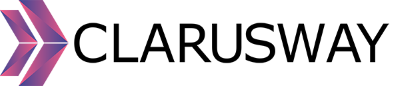

 **<h1 style="text-align: center;">Deep Learning: Churn Prediction for Bank Customer<br><h1>**


###**Classification with ANN**

# ✿                

#**Dataset Info**

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** Does the customer have a credit card or not?
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# ✿                

In [6]:
# Improt Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [7]:
#The warnings module provides functions for controlling warnings,
#such as ignoring them or turning them into exceptions.
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [8]:
# Get python version
!python --version
np.__version__

Python 3.10.12


'1.23.5'

In [9]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_columns", None)
#used to configure the Matplotlib plotting library for inline plotting and to set the default figure size, respectively.

In [10]:
#Here, because i'm using Google colab, i'm connecting to Google Drive so i can get the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
#reading the dataset
df = pd.read_csv("/content/drive/My Drive/DL/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


#**Exploratory Data Analysis and Visualization:**

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [12]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


(10000, 14)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [14]:
#The target
# 1 if the customer closed account with bank and 0 if the customer is retained.
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [15]:
#numerical variables
num = list(df.select_dtypes(include=['int64','float64']).keys())
print(num)

['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [16]:
#categorical variables
cat = list(df.select_dtypes(include='O').keys())
print(cat)

['Surname', 'Geography', 'Gender']


In [17]:
df.describe(include="object").T
#We're checking the objects

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [18]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [19]:
#Is there any NaN values?
df.isnull().sum().any()

False

In [20]:
df.duplicated().sum()

0

In [21]:
#Drop the features that not suitable for modelling (RowNumber, CustomerID, Surname)
df.drop(df.columns[[0, 1, 2]], axis=1, inplace=True)
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1


In [22]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Age,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012
Exited,-0.027,0.285,-0.014,0.119,-0.048,-0.007,-0.156,0.012,1.000


In [23]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

#**Visualization: histogram, countplot, heatmap ...etc.**

In [24]:
from ipywidgets import interact
#The interact function from the ipywidgets library allows you to
#create interactive widgets from Python functions. his can be a very
#useful way to explore data and experiment ith different parameters
#without having to write and run code each time.

interactive(children=(Dropdown(description='col', options=('Geography', 'Gender', 'Age', 'Tenure', 'Balance', …

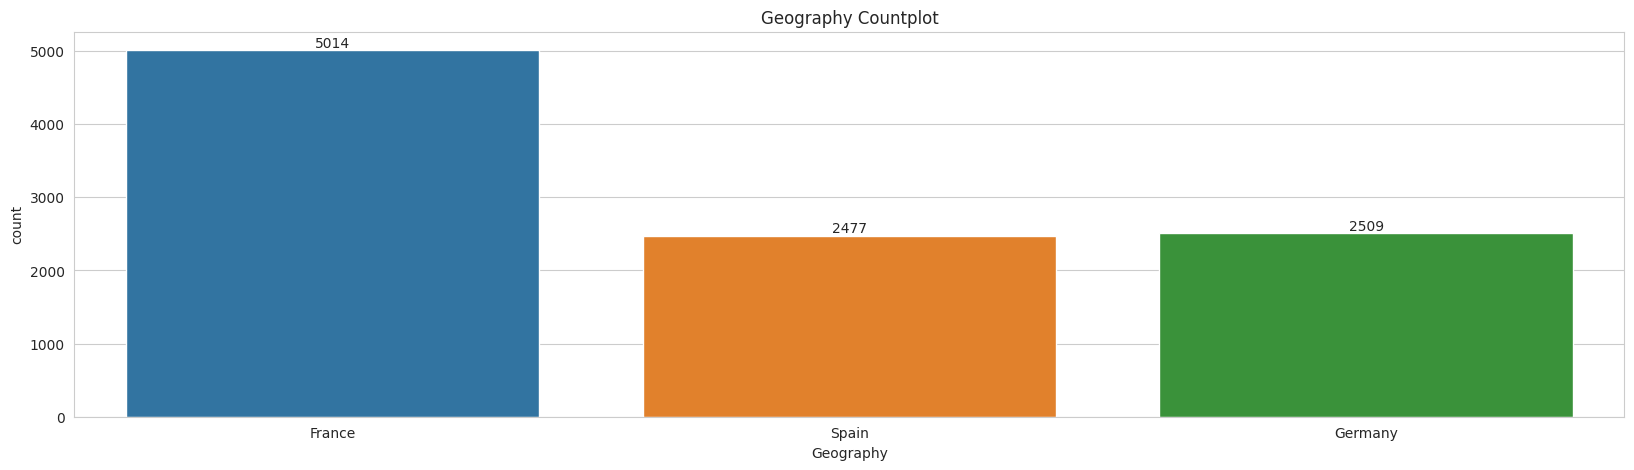

In [25]:
#histo histogram and countplot
@interact(col=df.columns[1:], chart=["countplot", "histogram"])
def plot(col, chart):
    colors = np.random.choice(['pink', 'purple', 'yellow'])
    if chart == "countplot":
        plt.figure(figsize=(20, 5))
        ax = sns.countplot(x=col, data=df)
        plt.title(col + ' Countplot')
        plt.xlabel(col)
        ax.bar_label(ax.containers[0])

    else:
        plt.figure(figsize=(20, 5))
        ax = sns.histplot(data=df, x=col, bins=80, kde=True, color=colors)
        plt.title(col + ' Histplot')
        plt.xlabel(col)
        ax.bar_label(ax.containers[0])


<Axes: >

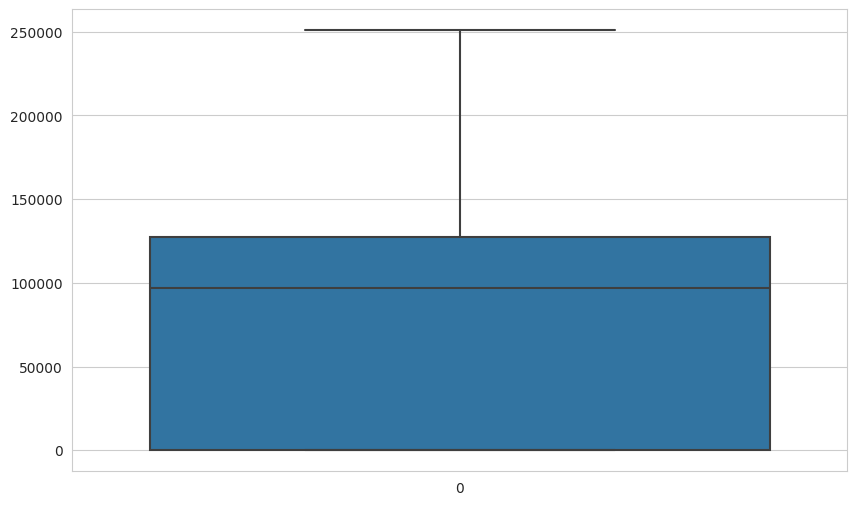

In [26]:
sns.boxplot(df["Balance"])

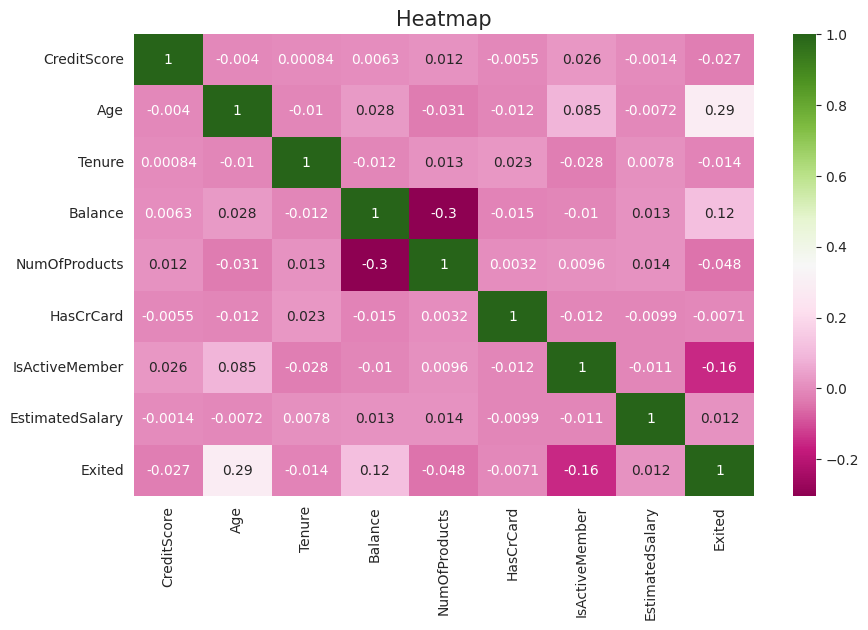

In [27]:
#Heatmap
sns.heatmap(df.corr(), cmap = 'PiYG', annot = True)
plt.title('Heatmap', fontsize = 15)
plt.show()

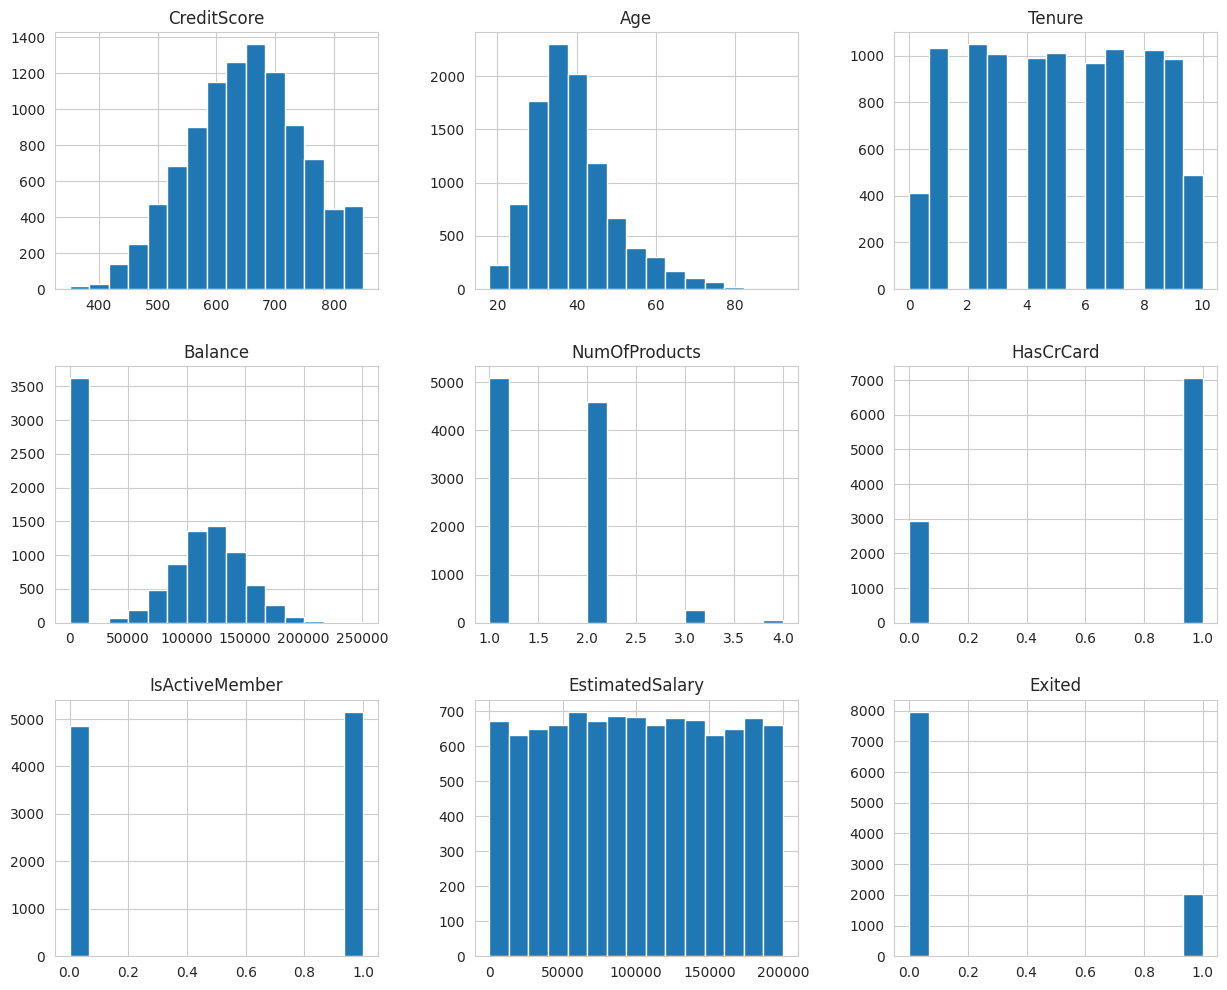

In [28]:
df.hist(figsize=(15,12), bins=15);

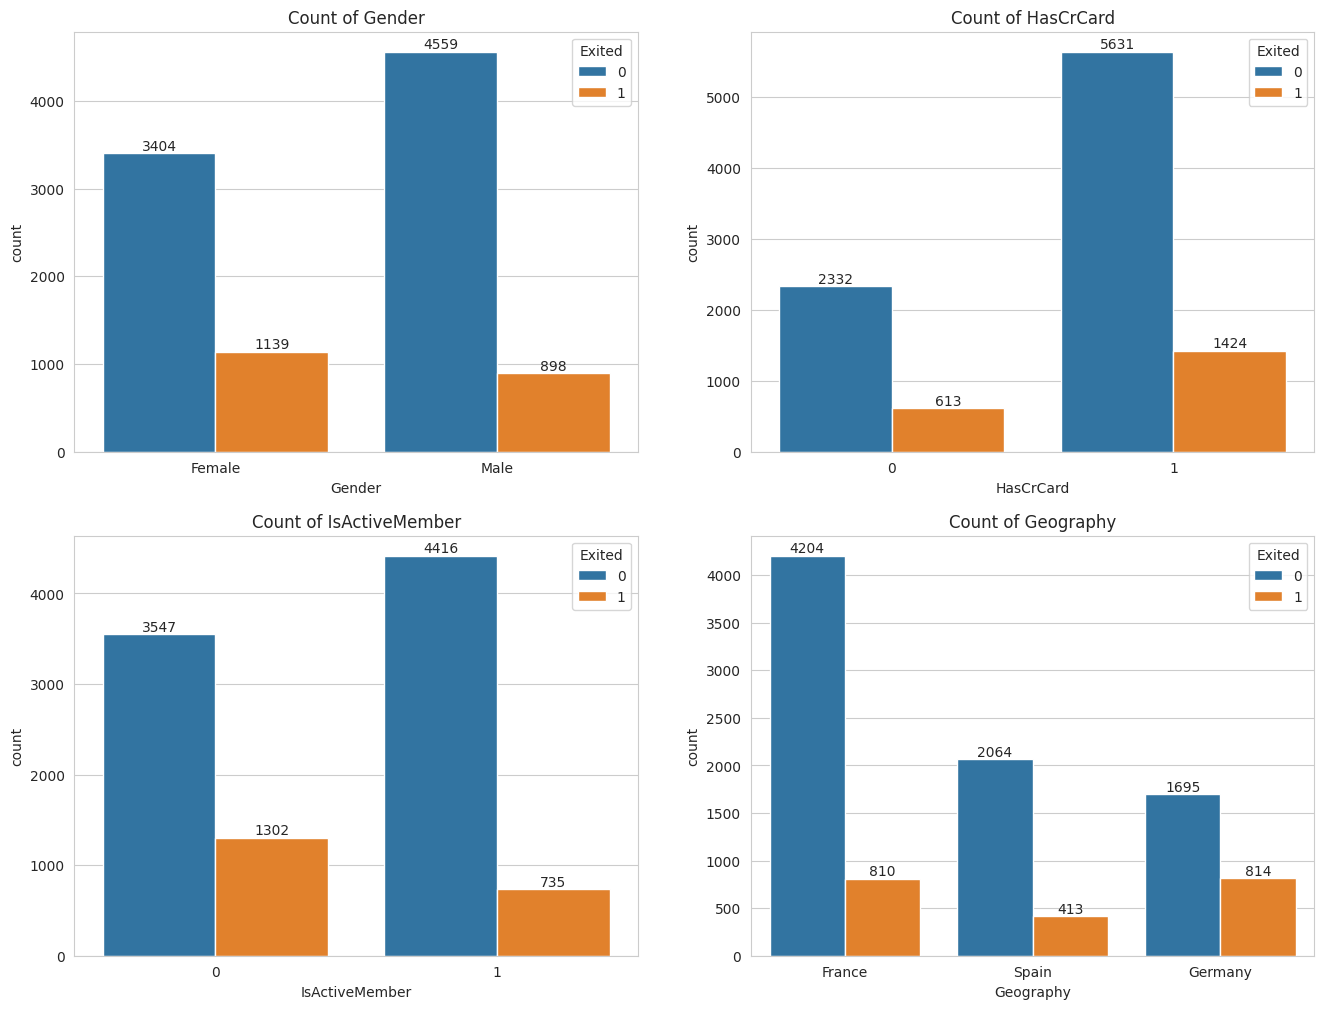

In [29]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    ax = sns.countplot(data = df, x = i, hue = "Exited")
    for k in ax.containers:
        ax.bar_label(k)
    plt.title(f"Count of {i}")

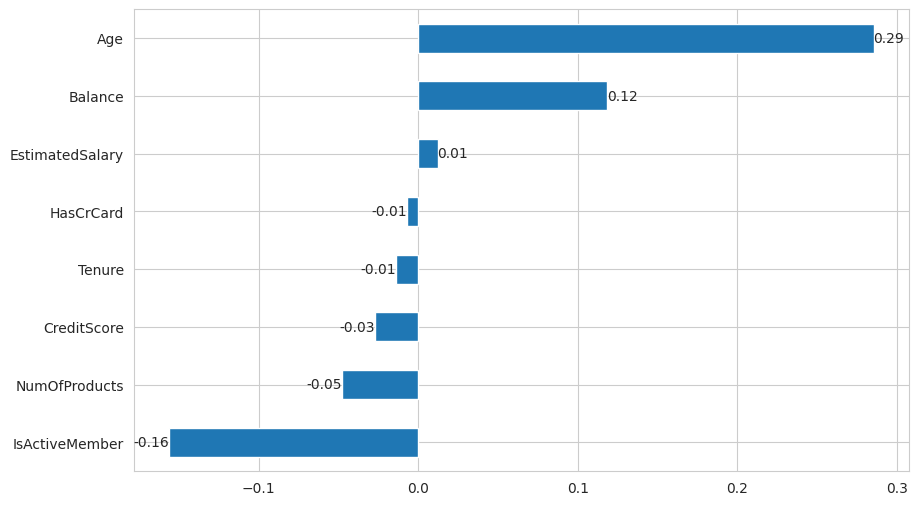

In [30]:
ax = df.corr()["Exited"][:-1].sort_values().plot.barh()
for i in ax.containers:
    ax.bar_label(i, fmt = "%.2f")

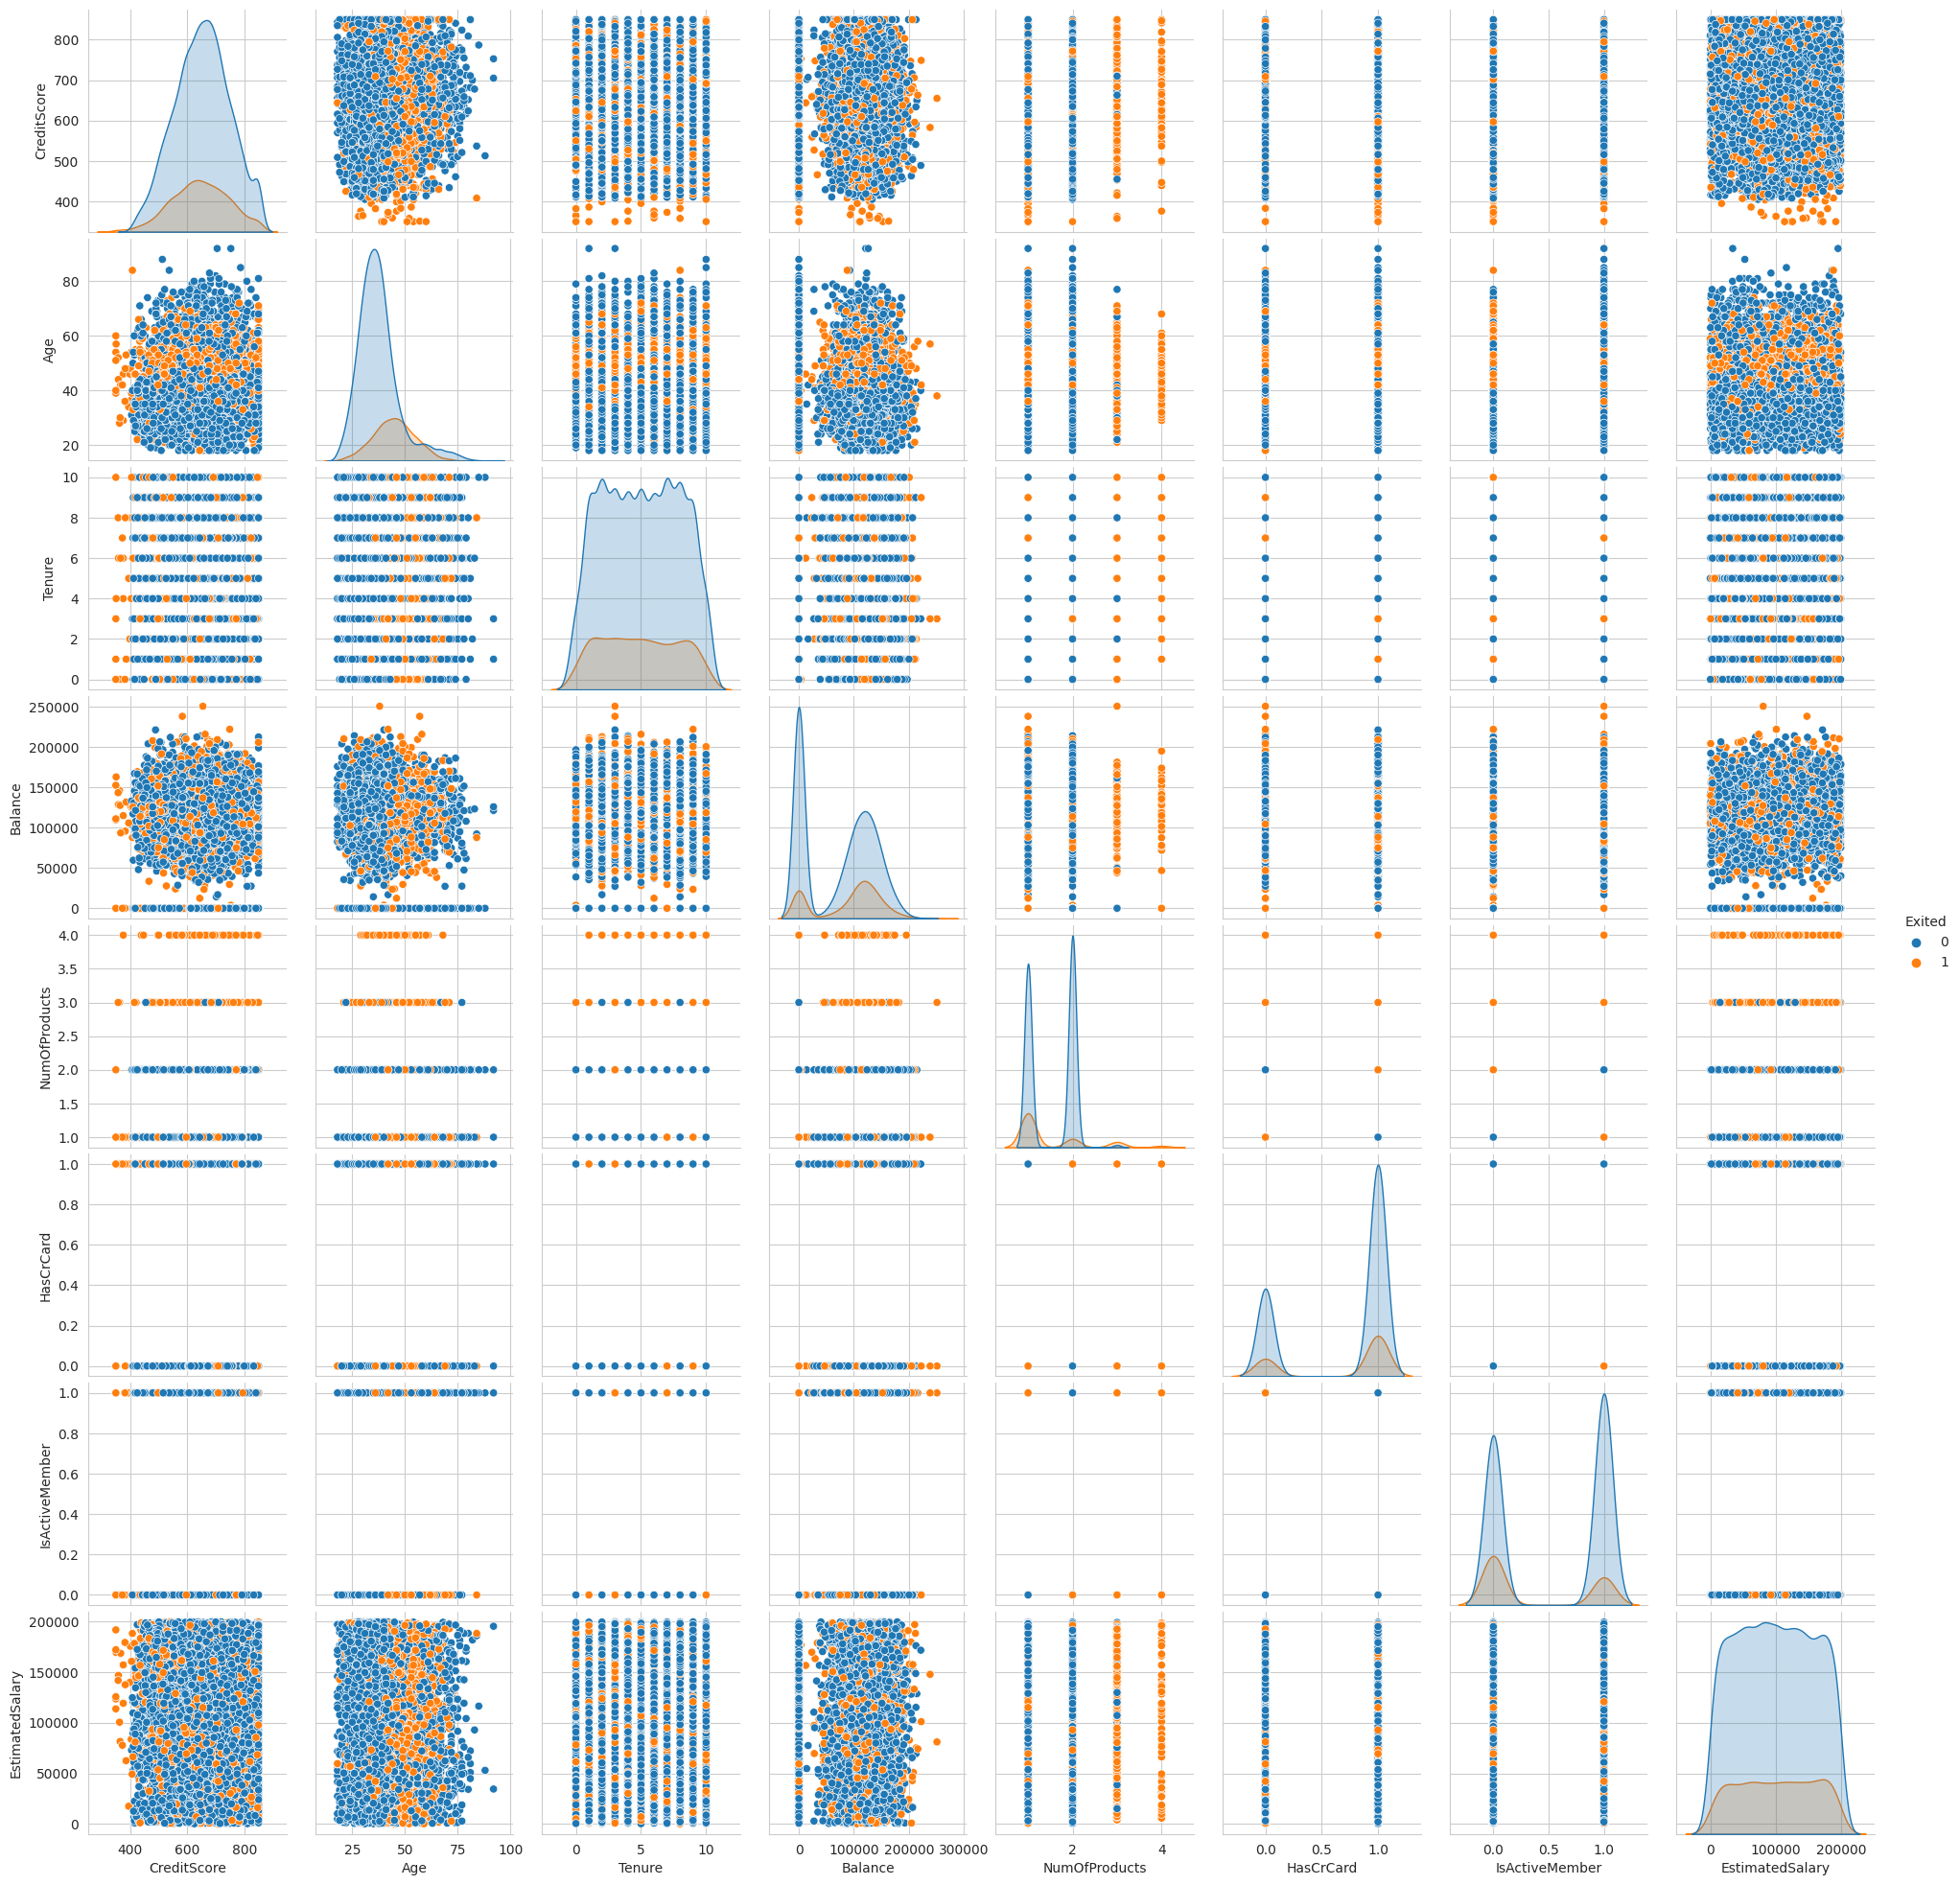

In [31]:
sns.pairplot(df, hue='Exited')

#**Convert categorical variables to dummy variables:**

In [32]:
# Converting 'Geography' and 'Gender' column
# Create dummy variables for the Geography and Gender variables.
geography = pd.get_dummies(df['Geography'], drop_first=True)
gender = pd.get_dummies(df['Gender'], drop_first=True)

In [33]:
# useing Concatto add these variables to the original dataframe
df=pd.concat([df,geography,gender],axis=1)
#“drop” the useless column from the data
df.drop(['Geography','Gender'],axis=1,inplace=True)

In [34]:
df.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
816,696,29,8,0.000,2,1,0,191166.090,0,0,0,1
318,628,22,3,0.000,1,1,0,85426.280,0,0,1,0
235,763,42,6,100160.750,1,1,0,33462.940,1,1,0,1
254,696,28,8,0.000,1,0,0,176713.470,0,0,1,1
488,692,30,2,0.000,2,0,1,130486.570,0,0,0,1


# P**reprocessing of Data**
- Train | Test Split, Scalling

In [35]:
#initializing the random number generator.
seed= 42
#By setting the seed to 42, we can ensure that the random numbers
#generated by the DL algorithm are always the same.
#This can be useful for debugging and reproducibility purposes.

In [36]:
X = df.drop(columns="Exited")
y = df["Exited"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.1, random_state = seed)

In [38]:
scaler = MinMaxScaler()

In [39]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [40]:
X_train.shape

(9000, 11)

## without class_weigth

### Create The Model

In [41]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [42]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 300, verbose = 1)

Epoch 1/300
64/64 [==============================] - 1s 6ms/step - loss: 0.5830 - recall: 0.0085 - val_loss: 0.5144 - val_recall: 0.0000e+00
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5031 - recall: 0.0000e+00 - val_loss: 0.4793 - val_recall: 0.0000e+00
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4790 - recall: 0.0000e+00 - val_loss: 0.4564 - val_recall: 0.0000e+00
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4655 - recall: 0.0103 - val_loss: 0.4432 - val_recall: 0.0773
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4583 - recall: 0.0938 - val_loss: 0.4341 - val_recall: 0.1492
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4512 - recall: 0.0817 - val_loss: 0.4269 - val_recall: 0.1160
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4444 - recall: 0.1308 - val_loss: 0.4149 - val_recall: 0.2210
Epoch 8/300
64/64 [==

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                240       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 499 (1.95 KB)
Trainable params: 499 (1.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<Axes: >

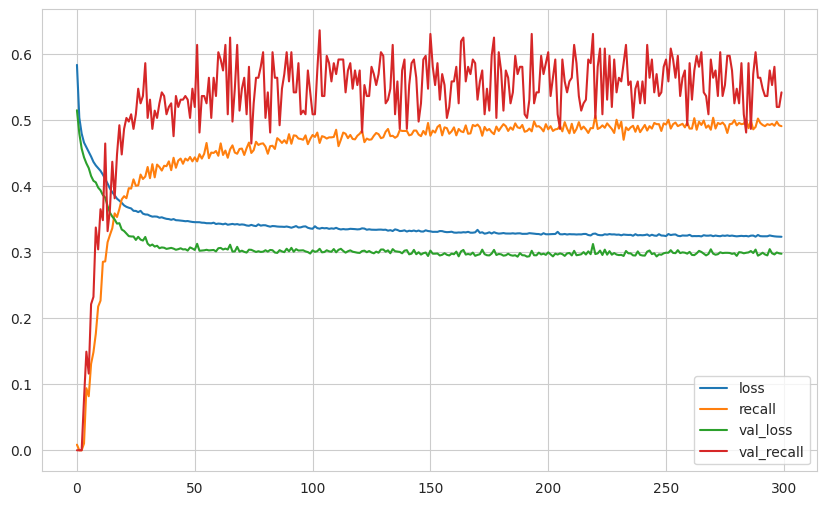

In [44]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [45]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


32/32 [==============================] - 0s 2ms/step
[[766  30]
 [112  92]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       796
           1       0.75      0.45      0.56       204

    accuracy                           0.86      1000
   macro avg       0.81      0.71      0.74      1000
weighted avg       0.85      0.86      0.84      1000



32/32 [==============================] - 0s 2ms/step


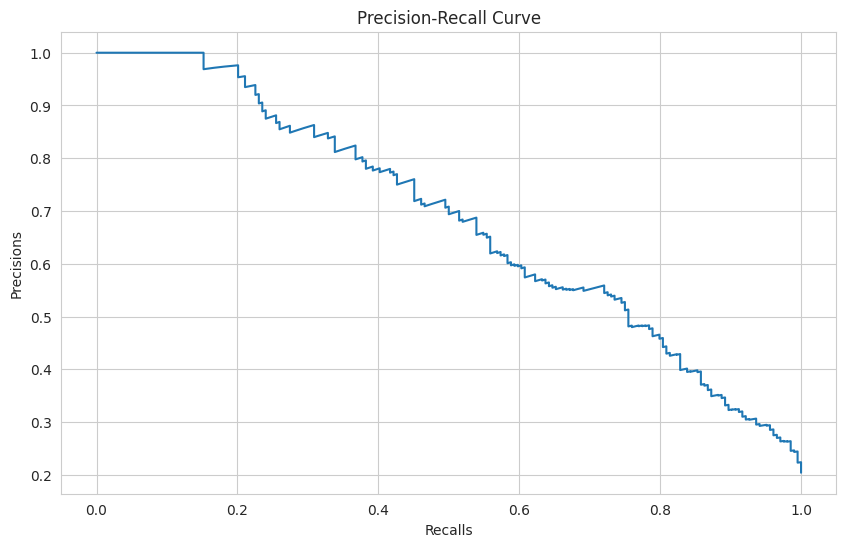

In [46]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label = "ANN")
plt.xlabel("Recalls")
plt.ylabel("Precisions")
plt.title("Precision-Recall Curve")
plt.show()


In [47]:
average_precision_score(y_test, y_pred_proba)

0.6844087620287255

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [48]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [49]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight("balanced", classes = np.unique(y_train), y = y_train)
class_weights = {0 : class_weights[0], 1 : class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [50]:
model.fit(x = X_train,
          y = y_train,
          validation_split = 0.1,
          batch_size = 128,
          epochs = 300,
          verbose = 1,
          class_weight = class_weights)

Epoch 1/300
64/64 [==============================] - 2s 10ms/step - loss: 0.6836 - recall: 0.7282 - val_loss: 0.6725 - val_recall: 0.6464
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6534 - recall: 0.6525 - val_loss: 0.6375 - val_recall: 0.6133
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6280 - recall: 0.6429 - val_loss: 0.5925 - val_recall: 0.6354
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6090 - recall: 0.6689 - val_loss: 0.5574 - val_recall: 0.6464
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5975 - recall: 0.6889 - val_loss: 0.5886 - val_recall: 0.7459
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5873 - recall: 0.7046 - val_loss: 0.5236 - val_recall: 0.6464
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5810 - recall: 0.6883 - val_loss: 0.5695 - val_recall: 0.7403
Epoch 8/300
64/64 [=====================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

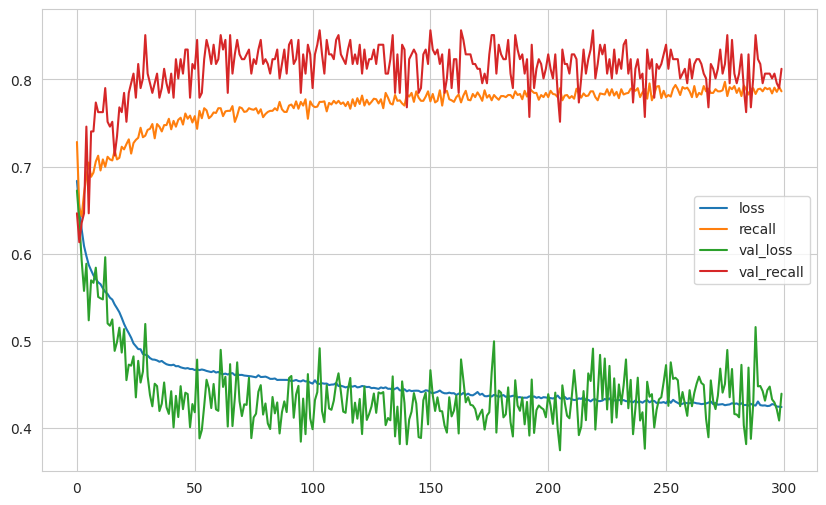

In [51]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [52]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[623 173]
 [ 48 156]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       796
           1       0.47      0.76      0.59       204

    accuracy                           0.78      1000
   macro avg       0.70      0.77      0.72      1000
weighted avg       0.84      0.78      0.80      1000



32/32 [==============================] - 0s 2ms/step


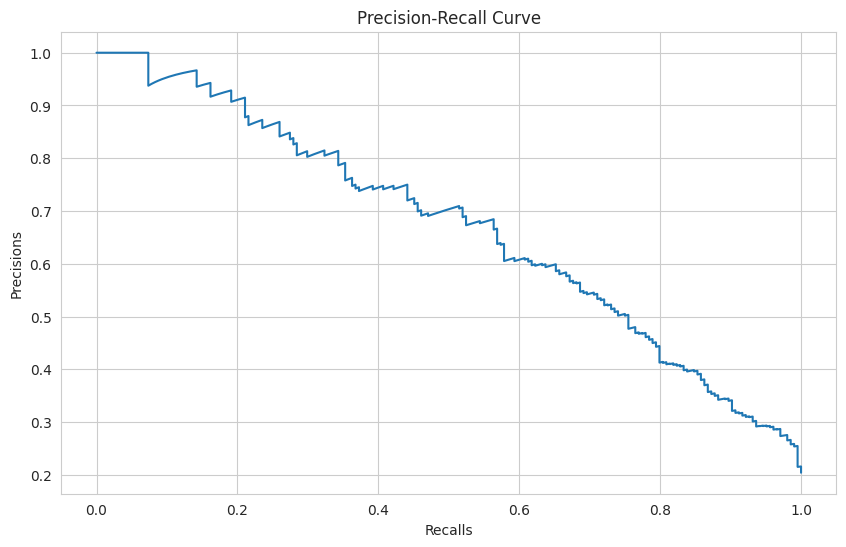

In [53]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label = "ANN")
plt.xlabel("Recalls")
plt.ylabel("Precisions")
plt.title("Precision-Recall Curve")
plt.show()

In [54]:
average_precision_score(y_test, y_pred_proba)

0.6705738457824973

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [55]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [56]:
model.fit(x = X_train,
          y = y_train,
          validation_split = 0.1,
          batch_size = 128,
          epochs = 1000,
          verbose = 1,
          class_weight = class_weights)

Epoch 1/1000
64/64 [==============================] - 2s 9ms/step - loss: 0.6899 - recall: 0.9461 - val_loss: 0.7113 - val_recall: 0.9006
Epoch 2/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.6747 - recall: 0.8547 - val_loss: 0.7134 - val_recall: 0.8508
Epoch 3/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6571 - recall: 0.8142 - val_loss: 0.7012 - val_recall: 0.8122
Epoch 4/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6448 - recall: 0.7778 - val_loss: 0.6834 - val_recall: 0.7845
Epoch 5/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6355 - recall: 0.7391 - val_loss: 0.6820 - val_recall: 0.7735
Epoch 6/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6259 - recall: 0.7337 - val_loss: 0.6525 - val_recall: 0.7459
Epoch 7/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6177 - recall: 0.7331 - val_loss: 0.6583 - val_recall: 0.7845
Epoch 8/1000
64/64 [==============

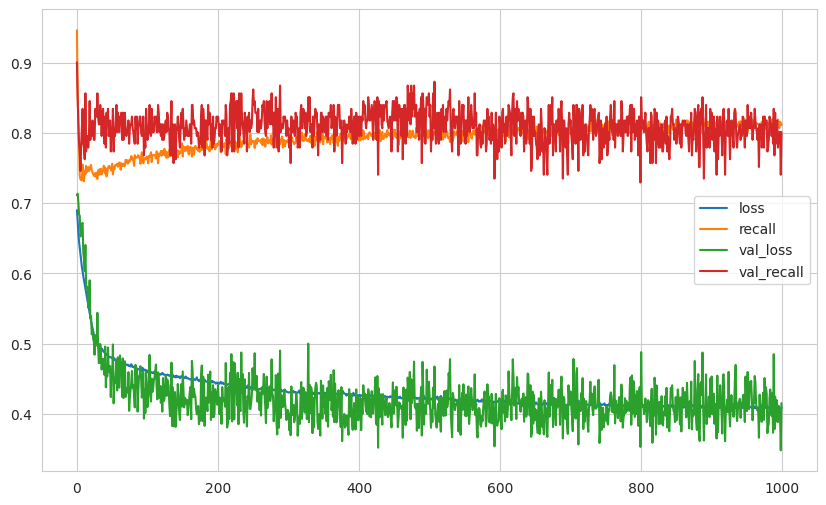

In [57]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [58]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[627 169]
 [ 51 153]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       796
           1       0.48      0.75      0.58       204

    accuracy                           0.78      1000
   macro avg       0.70      0.77      0.72      1000
weighted avg       0.83      0.78      0.80      1000



### Add Dropout Layer

In [59]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [60]:
model.fit(x = X_train,
          y = y_train,
          validation_split = 0.1,
          batch_size = 128,
          epochs = 400,
          verbose = 1,
          class_weight = class_weights)

Epoch 1/400
64/64 [==============================] - 1s 6ms/step - loss: 0.6952 - recall: 0.6362 - val_loss: 0.6735 - val_recall: 0.7127
Epoch 2/400
64/64 [==============================] - 0s 3ms/step - loss: 0.6861 - recall: 0.6749 - val_loss: 0.6505 - val_recall: 0.6906
Epoch 3/400
64/64 [==============================] - 0s 3ms/step - loss: 0.6774 - recall: 0.6901 - val_loss: 0.6303 - val_recall: 0.6851
Epoch 4/400
64/64 [==============================] - 0s 3ms/step - loss: 0.6708 - recall: 0.6925 - val_loss: 0.6033 - val_recall: 0.6464
Epoch 5/400
64/64 [==============================] - 0s 3ms/step - loss: 0.6591 - recall: 0.6713 - val_loss: 0.6282 - val_recall: 0.7514
Epoch 6/400
64/64 [==============================] - 0s 3ms/step - loss: 0.6535 - recall: 0.6804 - val_loss: 0.5911 - val_recall: 0.6851
Epoch 7/400
64/64 [==============================] - 0s 3ms/step - loss: 0.6466 - recall: 0.6780 - val_loss: 0.6066 - val_recall: 0.7514
Epoch 8/400
64/64 [======================

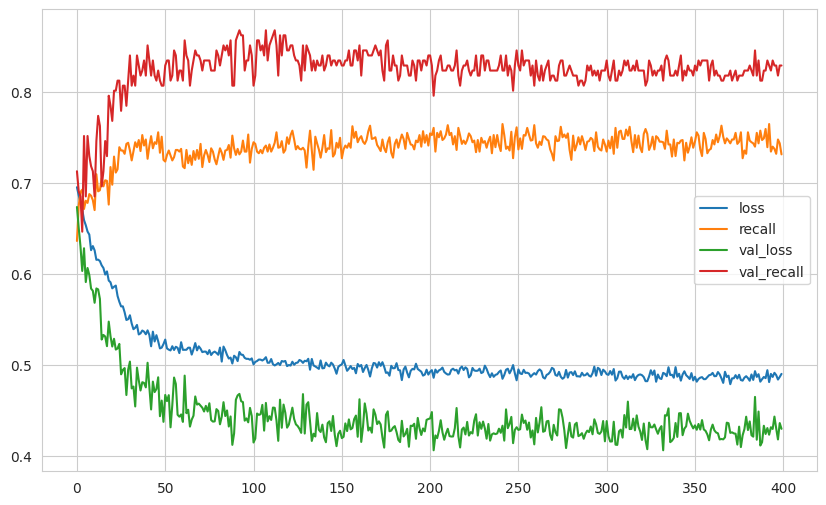

In [61]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [62]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[606 190]
 [ 43 161]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       796
           1       0.46      0.79      0.58       204

    accuracy                           0.77      1000
   macro avg       0.70      0.78      0.71      1000
weighted avg       0.84      0.77      0.79      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [63]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])


In [64]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 100, restore_best_weights = True)

In [65]:
model.fit(x = X_train,
          y = y_train,
          validation_split = 0.1,
          batch_size = 128,
          epochs = 400,
          verbose = 1,
          class_weight = class_weights,
          callbacks = [early_stop])

Epoch 1/400
64/64 [==============================] - 1s 6ms/step - loss: 0.6958 - recall: 0.3372 - val_loss: 0.6848 - val_recall: 0.4365
Epoch 2/400
64/64 [==============================] - 0s 3ms/step - loss: 0.6833 - recall: 0.3238 - val_loss: 0.6576 - val_recall: 0.5470
Epoch 3/400
64/64 [==============================] - 0s 3ms/step - loss: 0.6757 - recall: 0.5327 - val_loss: 0.6437 - val_recall: 0.6354
Epoch 4/400
64/64 [==============================] - 0s 3ms/step - loss: 0.6616 - recall: 0.5817 - val_loss: 0.6044 - val_recall: 0.5912
Epoch 5/400
64/64 [==============================] - 0s 3ms/step - loss: 0.6511 - recall: 0.6041 - val_loss: 0.6224 - val_recall: 0.7182
Epoch 6/400
64/64 [==============================] - 0s 3ms/step - loss: 0.6472 - recall: 0.6459 - val_loss: 0.6127 - val_recall: 0.7182
Epoch 7/400
64/64 [==============================] - 0s 3ms/step - loss: 0.6356 - recall: 0.6114 - val_loss: 0.6118 - val_recall: 0.7348
Epoch 8/400
64/64 [======================

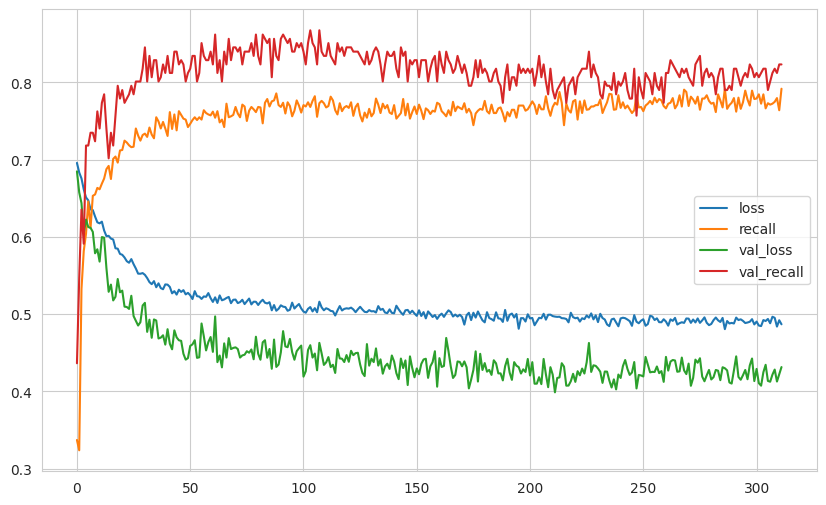

In [66]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [67]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[659 137]
 [ 57 147]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       796
           1       0.52      0.72      0.60       204

    accuracy                           0.81      1000
   macro avg       0.72      0.77      0.74      1000
weighted avg       0.84      0.81      0.82      1000



#### Monitor the "val_recall" as metric

In [68]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [69]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 200, restore_best_weights = True)

In [70]:
model.fit(x = X_train,
          y = y_train,
          validation_split = 0.1,
          batch_size = 128,
          epochs = 1000,
          verbose = 1,
          class_weight = class_weights,
          callbacks = [early_stop])

Epoch 1/1000
64/64 [==============================] - 1s 6ms/step - loss: 0.6925 - recall: 0.6919 - val_loss: 0.6911 - val_recall: 0.7293
Epoch 2/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6808 - recall: 0.5751 - val_loss: 0.6675 - val_recall: 0.6519
Epoch 3/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6706 - recall: 0.5061 - val_loss: 0.6346 - val_recall: 0.6133
Epoch 4/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6657 - recall: 0.5357 - val_loss: 0.6179 - val_recall: 0.6188
Epoch 5/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6541 - recall: 0.5502 - val_loss: 0.6385 - val_recall: 0.7459
Epoch 6/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6602 - recall: 0.5091 - val_loss: 0.6192 - val_recall: 0.6961
Epoch 7/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6495 - recall: 0.5297 - val_loss: 0.6306 - val_recall: 0.7569
Epoch 8/1000
64/64 [==============

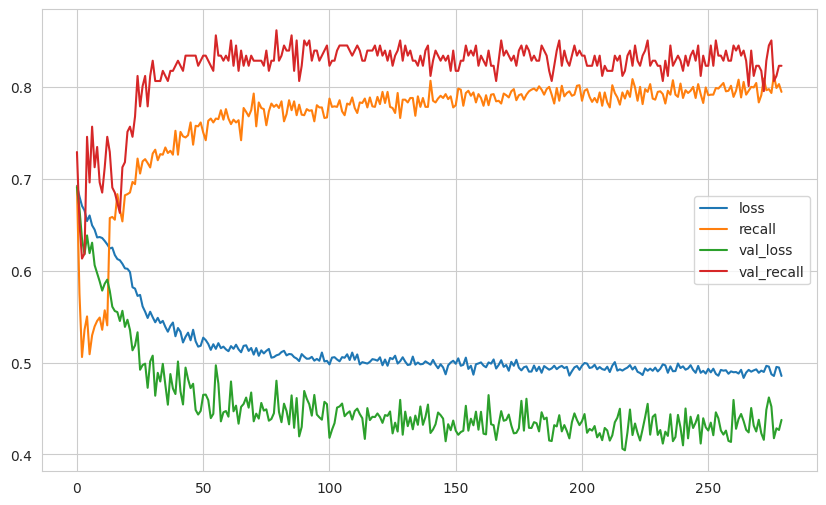

In [71]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [72]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[575 221]
 [ 36 168]]
              precision    recall  f1-score   support

           0       0.94      0.72      0.82       796
           1       0.43      0.82      0.57       204

    accuracy                           0.74      1000
   macro avg       0.69      0.77      0.69      1000
weighted avg       0.84      0.74      0.77      1000



## GridSearchCV

In [79]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 20, activation = "relu"))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 10, activation = "relu"))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 4, activation = "relu"))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = "sigmoid"))
    classifier.compile(optimizer = optimizer(learn_rate), loss = "binary_crossentropy", metrics = ["Recall"])
    return classifier

In [80]:
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [81]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 100, restore_best_weights = True)